In [1]:
import os
from spacepy import pycdf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
tcrude=np.linspace(0,729,730)
crude=np.random.uniform(20,100,730)
tng=np.linspace(0,729,104)
ng=np.random.uniform(5,30,104)

In [3]:
price=pycdf.CDF('price.cdf','')
price['daily_time']=tcrude
price['weekly_time']=tng
price['crude_price']=crude
price['naturalgas_price']=ng
price.attrs['Author']='John Doe'
price.attrs['source']='www.randomlygenerateddata.org'
price.attrs['method']='A data was randomly generated with the upper and lower limits set for the price'
price['crude_price'].attrs['Units']='$/gallon'
price['naturalgas_price'].attrs['Units']='$/barrel'
price.attrs['date']=datetime.datetime.now()
price.close()

In [5]:
data=pycdf.CDF('price.cdf')
print(data)
print('----')
print(data.attrs)
print('----')
print(data['crude_price'].attrs)
print('----')
print(data['crude_price'][1])

crude_price: CDF_DOUBLE [730]
daily_time: CDF_DOUBLE [730]
naturalgas_price: CDF_DOUBLE [104]
weekly_time: CDF_DOUBLE [104]
----
Author: John Doe [CDF_CHAR]
date: 2020-06-02 16:51:58.507000 [CDF_EPOCH]
method: A data was randomly generated with the upper and lower limits set for the price [CDF_CHAR]
source: www.randomlygenerateddata.org [CDF_CHAR]
----
Units: $/gallon [CDF_CHAR]
----
22.190369409353245


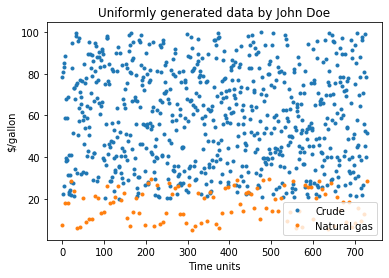

In [23]:
plt.plot(data['daily_time'][:],data['crude_price'][:],'.',label='Crude')
plt.plot(data['weekly_time'][:],data['naturalgas_price'][:],'.',label='Natural gas')
plt.legend()
plt.xlabel('Time units')
plt.ylabel(data['crude_price'].attrs['Units'])
plt.title('Uniformly generated data by '+str(data.attrs['Author']))
plt.show()